# Word2Vec (Google) : Pré-entraînement sur un corpus en français. 

## Modèles  de Word Embeddings 

In [ ]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [23]:
# Charger les données
file_path = "../tweets_labelled.csv"
df = pd.read_csv(file_path)

### Nettoyage des données

In [24]:
# Supprimer les URL et mentions dans le texte
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Supprimer les liens
    # text = re.sub(r"@\S+", "", text)  # Supprimer les mentions
    # text = re.sub(r"[^a-zA-Z\s]", "", text)  # Supprimer les caractères spéciaux
    text = text.encode('ascii', 'ignore').decode('ascii') # supprimer les emojis
    # text = text.lower()  # Convertir en minuscules
    return text

df['cleaned_text'] = df['Texte'].astype(str).apply(clean_text)

In [32]:
# Mettre les mentions dans une autre colonne et les supprimer du texte
def get_mentions(text):
    mentions = re.findall(r"@\S+", text)
    return mentions

def remove_mentions(text):
    text = re.sub(r"@\S+", "", text)
    return text

df['mentions'] = df['cleaned_text'].apply(get_mentions)
df['cleaned_text'] = df['cleaned_text'].apply(remove_mentions)

In [33]:
# visualiser uniquement les caractères spéciaux
def special_characters(text):
    text = re.sub(r"[a-zA-Z\s]", "", text)  # Supprimer les caractères spéciaux
    return text

# afficher la totalité des caractères spéciaux
print(df['cleaned_text'].apply(special_characters).sum())

_:":10,:",":",,."_:"',,''.":"..":"-,-5.,--?":"5:,.!":"-32021#'#,"'".()":"."_:",:#...-.:"49.3-.."_:"15.,20##--.#22[1]75012:"20":"5/._12:"12.'''.!":"1:"2:"":",:""()?57:"...":":"#13.12.."8465:".?":"100"_:".&;.,,...,'.,!21615641:"!!!"_:".2022:.',,...""......?"_:"44190:"''....":",,'.44190:"''...."974:"','.."44190:"............"974:"!'!!":",,.!":",,.":",,..."1:"',''6500,',','?":"'..":"(),!(),,.:):"!":",'._:"":"...."_:"''3/4-0.!!":",'?":",'":"!:.":"''......":""",'.''..":"-''?":",'().,'(').',,.":"''3.":",(),(),(20).,."111:""".';'.":"?"111:".().',,.":"'.../..."111:"..1.."_:"--?,:"""":"-321:"":"',..'2,.1/3','60%.:"()::.":"##,.#"17:"#,,'.....!-!#":".."1:".,',..":"':,,,'.,,'''.":",."__:"'.":":-.83154613:"?":":2023:"?!.??":"|#-."_2:"!'!!":""',":",.62.."___:".,.":"......"___:"?..":".":"-'''##.":":'":"'!":"'280$'1,07.?":"2,?'..":"31.'.'._:"'?',,?":"31'!""',',!":"?,31/12()::".?2."1472:".":"',,.''!000016',1'27.:2&;2050_:":??.":".,''-?',,.'.":":,149002035.2020.462030.":"...2035...?.......,....._:",'"":"

In [26]:
# afficher uniquement les mentions
def mentions(text):
    text = re.findall(r"@\S+", text)  # Trouver les mentions
    return text

# afficher les mentions
print(df['cleaned_text'].apply(mentions).sum())

['@le_Parisien', '@FloPortelli', '@le_Parisien', '@SAbdelhamid', '@FloPortelli', '@le_Parisien', '@eve_thefirst', '@SAbdelhamid', '@FloPortelli', '@le_Parisien', '@Gemenne', '@Mediavenir', '@Elisabeth_Borne', '@AgnesRunacher', '@franckriester', '@Prefet77', '@derniere_renov', '@GDarmanin', '@Alex_Car12', '@GDarmanin', '@JoseBourassa1', '@HazukiC72903092', '@JMJancovici', '@Lambda57', '@JMJancovici', '@sandrousseau', '@8c4a65cf', '@sandrousseau', '@G_Peltier', '@Beatrice_Rosen', '@Tonyetoui44190', '@Beatrice_Rosen', '@CMantenac', '@Beatrice_Rosen', '@Tonyetoui44190', '@CMantenac', '@Beatrice_Rosen', '@oldSpike974', '@CMantenac', '@Beatrice_Rosen', '@Tonyetoui44190', '@CMantenac', '@Beatrice_Rosen', '@EmmanuelMacron', '@GrandserreSylv1', '@EmmanuelMacron', '@fmomboisse', '@AuRupteur', '@Cyrilhanouna', '@FRDPRH', '@monsieurnaudin', '@DavidStOnge', '@DallaireBitcoin', '@DavidStOnge', '@DallaireBitcoin', '@DavidStOnge', '@DallaireBitcoin', '@alezan111bye', '@DallaireBitcoin', '@DavidStOnge'

# apres layla je n'ai rien fait c'est GPT

In [ ]:
# Gérer les valeurs manquantes
df = df.dropna(subset=['cleaned_text'])  # Supprimer les lignes avec des textes manquants

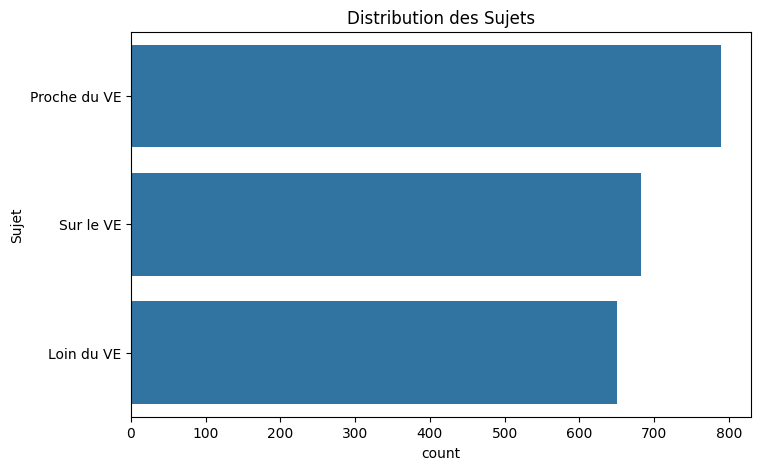

In [9]:
# Analyse des catégories (distribution des sujets)
plt.figure(figsize=(8, 5))
sns.countplot(y='Sujet', data=df, order=df['Sujet'].value_counts().index)
plt.title("Distribution des Sujets")
plt.show()

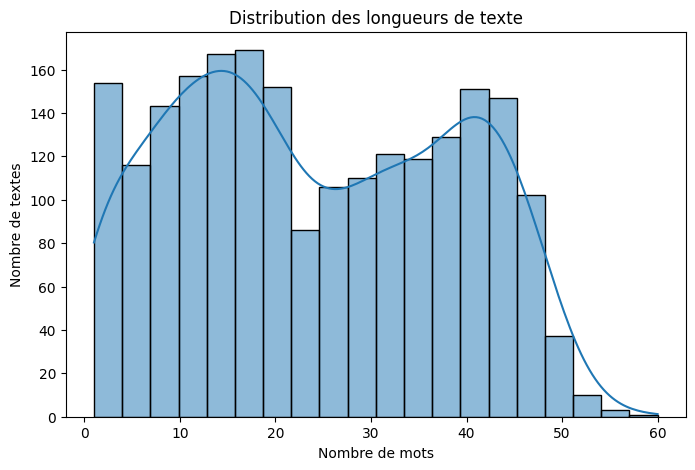

In [10]:
# Analyse des longueurs de texte
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=20, kde=True)
plt.title("Distribution des longueurs de texte")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de textes")
plt.show()

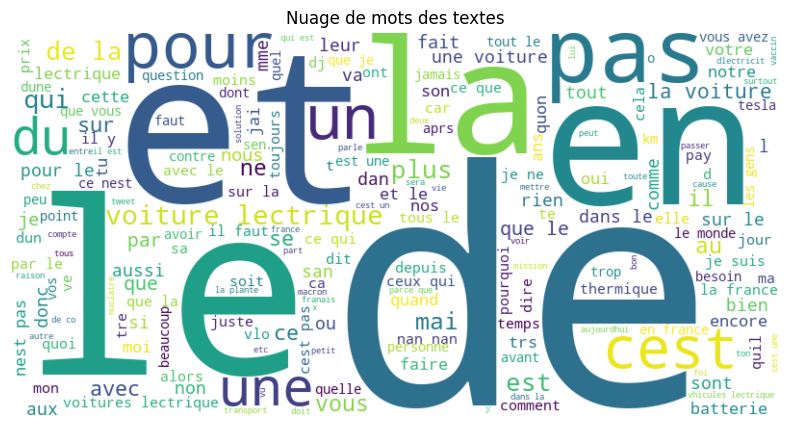

In [11]:
# Nuage de mots (WordCloud)
all_text = " ".join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des textes")
plt.show()

In [12]:
# Fréquences des mots
from collections import Counter

all_words = " ".join(df['cleaned_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

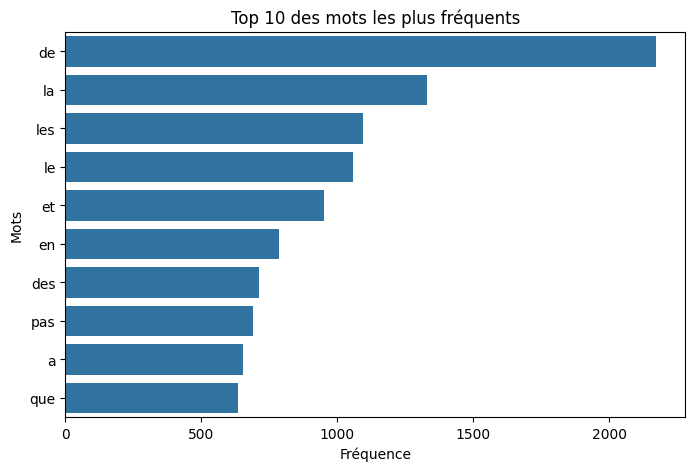

In [13]:
# Visualiser les mots les plus fréquents
words, counts = zip(*common_words)
plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 10 des mots les plus fréquents")
plt.xlabel("Fréquence")
plt.ylabel("Mots")
plt.show()